<a href="https://colab.research.google.com/github/Oormila-C/Automatic-Image-Caption-Generator./blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import IPython.display as ipd
      9 from google.colab import files
---> 10 from googletrans import Translator

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Saving s.jpg to s (1).jpg
Generated Caption (Greedy): school building clipart clipart clipart clipart
Generated Caption (Beam Search): a boy and a girl standing in front of a school building
Enter language code for speech (e.g., 'en' for English, 'fr' for French, 'ta' for Tamil): ta


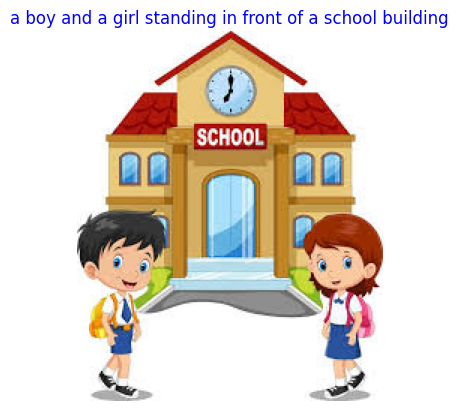

Image Metadata: {'Format': 'JPEG', 'Size': (204, 247), 'Mode': 'RGB'}


In [ ]:
import os
import numpy as np
import torch
from PIL import Image, ImageEnhance
import matplotlib.pyplot as plt
from transformers import BlipProcessor, BlipForConditionalGeneration
from gtts import gTTS
import IPython.display as ipd
from google.colab import files
from googletrans import Translator

# Load BLIP model and processor
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")

def preprocess_image(img_path):
    """Enhance image quality and resize for better processing."""
    image = Image.open(img_path).convert("RGB")
    enhancer = ImageEnhance.Contrast(image)
    image = enhancer.enhance(1.5)  # Increase contrast
    image = image.resize((384, 384))  # Resize to match BLIP input size
    return image

def generate_caption(img_path, mode="greedy"):
    """Generate a caption for the given image using different strategies."""
    image = preprocess_image(img_path)
    inputs = processor(image, return_tensors="pt")

    if mode == "greedy":
        out = model.generate(**inputs)
    elif mode == "beam":
        out = model.generate(**inputs, num_beams=5, early_stopping=True)
    else:
        raise ValueError("Invalid mode! Choose 'greedy' or 'beam'.")

    caption = processor.decode(out[0], skip_special_tokens=True)
    return caption

def text_to_speech(text, lang='en'):
    """Convert text to speech with language selection, including Tamil translation."""
    if not text.strip():
        text = "Sorry, I couldn't generate a caption."

    supported_languages = ['en', 'fr', 'ta']  # English, French, Tamil

    if lang not in supported_languages:
        print(f"Language '{lang}' not supported! Defaulting to English.")
        lang = 'en'

    # Translate text if Tamil is selected
    if lang == 'ta':
        translator = Translator()
        text = translator.translate(text, dest='ta').text

    tts = gTTS(text=text, lang=lang, slow=False)
    tts.save("caption.mp3")
    return ipd.Audio("caption.mp3")

def display_ui(img_path, caption):
    """Display the image and the generated caption with speech output."""
    plt.imshow(Image.open(img_path))
    plt.axis('off')
    plt.title(caption, fontsize=12, color='blue')
    plt.show()

def get_image_metadata(img_path):
    """Retrieve basic metadata about the uploaded image."""
    image = Image.open(img_path)
    return {"Format": image.format, "Size": image.size, "Mode": image.mode}

# Upload an image file manually
uploaded = files.upload()
img_path = list(uploaded.keys())[0]  # Get the uploaded file name

# Generate caption using both greedy and beam search
caption_greedy = generate_caption(img_path, mode="greedy")
caption_beam = generate_caption(img_path, mode="beam")

print("Generated Caption (Greedy):", caption_greedy)
print("Generated Caption (Beam Search):", caption_beam)

# Choose language for text-to-speech
lang_choice = input("Enter language code for speech (e.g., 'en' for English, 'fr' for French, 'ta' for Tamil): ")

# Convert caption to audio and play
audio = text_to_speech(caption_beam, lang=lang_choice)
ipd.display(audio)

# Display Image with caption
display_ui(img_path, caption_beam)

# Show image metadata
metadata = get_image_metadata(img_path)
print("Image Metadata:", metadata)


In [ ]:
!pip install googletrans==4.0.0-rc1


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 31.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 3.9 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17396 sha256=361f447bc3d81ff7c96cb3bd4f6c03abe665c76d1dcca80e300a691b2697979d
  Stored in directory: /root/.cache/pip/wheels/95/0f/04/b17a72024b56a60e499ce1a6313d283ed5ba332407155bee03
Successfully built googletrans
  Attempting uninstall: hyperframe
    Found existing installation: hyperframe 6.1.0
    Uninstalling hyperfram

In [ ]:
!pip install googletrans


In [ ]:
!pip install gtts

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 kB 3.9 MB/s eta 0:00:00
  Attempting uninstall: click
    Found existing installation: click 8.3.1
    Uninstalling click-8.3.1:
      Successfully uninstalled click-8.3.1
